In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import EfficientNetB0, ResNet50, MobileNetV2, VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [2]:
import os
import shutil
import random

def split_dir_to_train_test_val(directory, train_size=0.7, test_size=0.2, val_size=0.1, output_dir="/kaggle/working/split_data"):
    if not os.path.exists(directory):
        print("Error: Directory does not exist.")
        return
    
    # Define output directories (inside /kaggle/working/)
    train_dir = os.path.join(output_dir, "train")
    test_dir = os.path.join(output_dir, "test")
    val_dir = os.path.join(output_dir, "val")

    # Create train, test, and val directories in /kaggle/working/
    for split_dir in [train_dir, test_dir, val_dir]:
        os.makedirs(split_dir, exist_ok=True)

    # Iterate through the first-level subdirectories (SubDirectory1)
    for sub_dir1 in os.listdir(directory):
        sub_dir1_path = os.path.join(directory, sub_dir1)

        if not os.path.isdir(sub_dir1_path):  # Skip files like read.md
            continue

        # Iterate through second-level subdirectories (SubDirectory2)
        for sub_dir2 in os.listdir(sub_dir1_path):
            sub_dir2_path = os.path.join(sub_dir1_path, sub_dir2)

            if not os.path.isdir(sub_dir2_path):  # Skip files like read.md
                continue

            # Get all image files inside sub_dir2
            all_files = [f for f in os.listdir(sub_dir2_path) if os.path.isfile(os.path.join(sub_dir2_path, f))]

            if len(all_files) == 0:
                continue  # Skip empty directories

            # Shuffle files for randomness
            random.shuffle(all_files)

            # Compute split sizes
            train_count = int(len(all_files) * train_size)
            test_count = int(len(all_files) * test_size)

            train_files = all_files[:train_count]
            test_files = all_files[train_count:train_count + test_count]
            val_files = all_files[train_count + test_count:]

            # Copy files into train, test, val folders while preserving structure
            for split_name, split_files in zip(["train", "test", "val"], [train_files, test_files, val_files]):
                split_dest = os.path.join(output_dir, split_name, sub_dir1, sub_dir2)
                os.makedirs(split_dest, exist_ok=True)  # Now works inside /kaggle/working/

                for file_name in split_files:
                    src_path = os.path.join(sub_dir2_path, file_name)
                    dst_path = os.path.join(split_dest, file_name)
                    shutil.copy2(src_path, dst_path)

            print(f"Processed {sub_dir1}/{sub_dir2}: Train={len(train_files)}, Test={len(test_files)}, Val={len(val_files)}")

# Example usage
split_dir_to_train_test_val("/kaggle/input/multi-cancer/Multi Cancer/Multi Cancer/")


Processed Cervical Cancer/cervix_koc: Train=3500, Test=1000, Val=500
Processed Cervical Cancer/cervix_dyk: Train=3500, Test=1000, Val=500
Processed Cervical Cancer/cervix_pab: Train=3500, Test=1000, Val=500
Processed Cervical Cancer/cervix_sfi: Train=3500, Test=1000, Val=500
Processed Cervical Cancer/cervix_mep: Train=3500, Test=1000, Val=500
Processed Lung and Colon Cancer/colon_bnt: Train=3500, Test=1000, Val=500
Processed Lung and Colon Cancer/colon_aca: Train=3500, Test=1000, Val=500
Processed Lung and Colon Cancer/lung_aca: Train=3500, Test=1000, Val=500
Processed Lung and Colon Cancer/lung_bnt: Train=3500, Test=1000, Val=500
Processed Lung and Colon Cancer/lung_scc: Train=3500, Test=1000, Val=500
Processed Oral Cancer/oral_scc: Train=3500, Test=1000, Val=501
Processed Oral Cancer/oral_normal: Train=3500, Test=1000, Val=501
Processed ALL/all_pro: Train=3500, Test=1000, Val=500
Processed ALL/all_benign: Train=3500, Test=1000, Val=500
Processed ALL/all_early: Train=3500, Test=1000, 

In [3]:
import os
import shutil

def move_selected_folders(output_dir="/kaggle/working/split_data", target_subfolders=None):
    """
    Moves specific subdirectories inside train/test/val into a new "merged_data" folder.

    :param output_dir: Root path of split dataset (e.g., /kaggle/working/split_data)
    :param target_subfolders: List of paths relative to each split folder to move
    """
    if target_subfolders is None:
        target_subfolders = [
            "ALL/all_benign",
            "Breast Cancer/breast_benign",
            "Kidney Cancer/kidney_normal",
            "Lung and Colon Cancer/colon_bnt",
            "Lung and Colon Cancer/lung_bnt",
            "Oral Cancer/oral_normal"
        ]

    # Dataset splits
    split_names = ["train", "test", "val"]

    for split in split_names:
        split_path = os.path.join(output_dir, split)
        merged_folder = os.path.join(split_path, "Healthy")

        # Create merged_data folder
        os.makedirs(merged_folder, exist_ok=True)

        # Move each target subfolder's files into merged_data
        for subfolder in target_subfolders:
            source_path = os.path.join(split_path, subfolder)

            if not os.path.isdir(source_path):  # Skip if folder doesn't exist
                continue

            # Move all files inside the subfolder to merged_data
            for root, _, files in os.walk(source_path):
                for file_name in files:
                    src_path = os.path.join(root, file_name)
                    dst_path = os.path.join(merged_folder, file_name)

                    shutil.move(src_path, dst_path)

            # Remove empty subfolder
            shutil.rmtree(source_path, ignore_errors=True)

        print(f"✅ Moved {target_subfolders} from {split} into {merged_folder}")

# Run the function to move the specific folders
move_selected_folders("/kaggle/working/split_data")


✅ Moved ['ALL/all_benign', 'Breast Cancer/breast_benign', 'Kidney Cancer/kidney_normal', 'Lung and Colon Cancer/colon_bnt', 'Lung and Colon Cancer/lung_bnt', 'Oral Cancer/oral_normal'] from train into /kaggle/working/split_data/train/Healthy
✅ Moved ['ALL/all_benign', 'Breast Cancer/breast_benign', 'Kidney Cancer/kidney_normal', 'Lung and Colon Cancer/colon_bnt', 'Lung and Colon Cancer/lung_bnt', 'Oral Cancer/oral_normal'] from test into /kaggle/working/split_data/test/Healthy
✅ Moved ['ALL/all_benign', 'Breast Cancer/breast_benign', 'Kidney Cancer/kidney_normal', 'Lung and Colon Cancer/colon_bnt', 'Lung and Colon Cancer/lung_bnt', 'Oral Cancer/oral_normal'] from val into /kaggle/working/split_data/val/Healthy


In [4]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load datasets
train_data = train_datagen.flow_from_directory("/kaggle/working/split_data/train", target_size=(128, 128), batch_size=32, class_mode="categorical")
val_data = val_datagen.flow_from_directory("/kaggle/working/split_data/val", target_size=(128, 128), batch_size=32, class_mode="categorical")
test_data = test_datagen.flow_from_directory("/kaggle/working/split_data/test", target_size=(128, 128), batch_size=32, class_mode="categorical")


Found 91000 images belonging to 9 classes.
Found 13002 images belonging to 9 classes.
Found 26000 images belonging to 9 classes.


In [5]:
# def custom_cnn():
#     model = Sequential([
#         Conv2D(16, 3, activation="relu", input_shape=(128, 128, 3)),
#         MaxPool2D(pool_size=2),
#         Conv2D(32, 3, activation="relu"),
#         MaxPool2D(pool_size=2),
#         Flatten(),
#         Dense(128, activation="relu"),
#         Dense(9, activation="softmax")
#     ])
#     model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
#     return model

from tensorflow.keras.layers import Dropout  # Import Dropout layer

def custom_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)),
        MaxPool2D(pool_size=(2, 2)),

        Conv2D(64, (3, 3), activation="relu"),
        MaxPool2D(pool_size=(2, 2)),

        Conv2D(128, (3, 3), activation="relu"),
        MaxPool2D(pool_size=(2, 2)),

        Flatten(),
        Dense(256, activation="relu"),
        Dropout(0.5),  # Helps prevent overfitting
        Dense(128, activation="relu"),
        Dense(9, activation="softmax")
    ])
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model



In [6]:
# def efficientnet():
#     base_model = EfficientNetB0(weights=None, include_top=False, input_shape=(128, 128, 3))
#     base_model.trainable = False  # Freeze base model
#     model = Sequential([
#         base_model,
#         GlobalAveragePooling2D(),
#         Dense(128, activation="relu"),
#         Dense(9, activation="softmax")
#     ])
#     model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])
#     return model


In [7]:
# def resnet50():
#     base_model = ResNet50(weights=None, include_top=False, input_shape=(128, 128, 3))
#     base_model.trainable = False
#     model = Sequential([
#         base_model,
#         GlobalAveragePooling2D(),
#         Dense(128, activation="relu"),
#         Dense(4, activation="softmax")
#     ])
#     model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])
#     return model


In [8]:
# def mobilenetv2():
#     base_model = MobileNetV2(weights=None, include_top=False, input_shape=(128, 128, 3))
#     base_model.trainable = False
#     model = Sequential([
#         base_model,
#         GlobalAveragePooling2D(),
#         Dense(128, activation="relu"),
#         Dense(9, activation="softmax")
#     ])
#     model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])
#     return model


In [9]:
# def vgg16():
#     base_model = VGG16(weights=None, include_top=False, input_shape=(128, 128, 3))
#     base_model.trainable = False
#     model = Sequential([
#         base_model,
#         GlobalAveragePooling2D(),
#         Dense(128, activation="relu"),
#         Dense(4, activation="softmax")
#     ])
#     model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])
#     return model


In [10]:
# Dictionary to store models and training history
models = {
    "Custom CNN": custom_cnn(),
    # "EfficientNetB0": efficientnet(),
    # "ResNet50": resnet50(),
    # "MobileNetV2": mobilenetv2(),
    # "VGG16": vgg16()
}

histories = {}

# Train each model
for name, model in models.items():
    print(f"\nTraining {name}...\n")
    history = model.fit(train_data, epochs=20, validation_data=val_data)
    histories[name] = history


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training Custom CNN...

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2844/2844 ━━━━━━━━━━━━━━━━━━━━ 270s 93ms/step - accuracy: 0.7539 - loss: 0.6374 - val_accuracy: 0.9357 - val_loss: 0.1767
Epoch 2/20
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 235s 82ms/step - accuracy: 0.9229 - loss: 0.1937 - val_accuracy: 0.9505 - val_loss: 0.1329
Epoch 3/20
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 225s 79ms/step - accuracy: 0.9404 - loss: 0.1538 - val_accuracy: 0.9585 - val_loss: 0.1066
Epoch 4/20
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 222s 78ms/step - accuracy: 0.9542 - loss: 0.1137 - val_accuracy: 0.9383 - val_loss: 0.1465
Epoch 5/20
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 225s 79ms/step - accuracy: 0.9609 - loss: 0.1035 - val_accuracy: 0.9598 - val_loss: 0.1021
Epoch 6/20
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 223s 78ms/step - accuracy: 0.9644 - loss: 0.0907 - val_accuracy: 0.9632 - val_loss: 0.1003
Epoch 7/20
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 217s 76ms/step - accuracy: 0.9684 - loss: 0.0807 - val_accuracy: 0.9695 - val_loss: 0.0773
Epoch 8/20
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 221s 77ms/step - accuracy: 0.9735 - lo

In [11]:
test_results = {}

for name, model in models.items():
    loss, accuracy = model.evaluate(test_data)
    test_results[name] = accuracy
    print(f"{name} - Test Accuracy: {accuracy:.4f}")


813/813 ━━━━━━━━━━━━━━━━━━━━ 68s 84ms/step - accuracy: 0.9715 - loss: 0.0958
Custom CNN - Test Accuracy: 0.9718


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report

# Store test results
metrics_results = {}
classification_reports = {}

# Load test dataset
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_data = test_datagen.flow_from_directory("/kaggle/working/split_data/test/", target_size=(128, 128), batch_size=32, class_mode="categorical", shuffle=False)

# Extract true labels
y_true = test_data.labels  # Get ground truth labels from the test generator

# Evaluate and generate classification report
test_results = {}
for name, model in models.items():
    loss, accuracy = model.evaluate(test_data)
    y_pred = model.predict(test_data)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
    
    report = classification_report(y_true, y_pred_classes, output_dict=True)
    
    test_results[name] = {
        "Accuracy": accuracy,
        "Classification Report": report
    }

    print(f"\n{name} - Test Accuracy: {accuracy:.4f}")
    print(classification_report(y_true, y_pred_classes))


Found 26000 images belonging to 9 classes.
  2/813 ━━━━━━━━━━━━━━━━━━━━ 47s 59ms/step - accuracy: 1.0000 - loss: 8.2929e-04 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


813/813 ━━━━━━━━━━━━━━━━━━━━ 56s 69ms/step - accuracy: 0.9865 - loss: 0.0445
813/813 ━━━━━━━━━━━━━━━━━━━━ 55s 67ms/step

Custom CNN - Test Accuracy: 0.9718
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3000
           1       1.00      1.00      1.00      3000
           2       0.93      0.92      0.92      1000
           3       0.99      1.00      1.00      5000
           4       0.95      0.94      0.94      6000
           5       1.00      1.00      1.00      1000
           6       0.99      0.98      0.99      3000
           7       1.00      1.00      1.00      3000
           8       0.77      0.79      0.78      1000

    accuracy                           0.97     26000
   macro avg       0.96      0.96      0.96     26000
weighted avg       0.97      0.97      0.97     26000



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


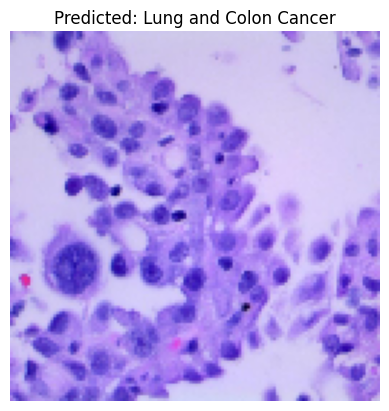

Predicted Class: Lung and Colon Cancer


In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Select the model to test
model_name = "Custom CNN"  # Change this to the model you want to use
model = models[model_name]  # Load model from dictionary

# Load class indices from test_data generator
class_indices = test_data.class_indices  # {'ClassA': 0, 'ClassB': 1, ...}
class_labels = {v: k for k, v in class_indices.items()}  # Reverse mapping

# Function to preprocess and predict a single image
def predict_single_image(img_path, model, class_labels):
    img = image.load_img(img_path, target_size=(128, 128))  # Resize image
    img_array = image.img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dims for batch
    img_array = img_array / 255.0  # Normalize (same as test generator)

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]  # Get class index
    predicted_label = class_labels[predicted_class]  # Get class name

    # Show image and prediction
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis("off")
    plt.show()

    return predicted_label

# Example usage
img_path = "/kaggle/working/split_data/test/Lung and Colon Cancer/lung_aca/lung_aca_0136.jpg"  # Change this to your image path
predicted_label = predict_single_image(img_path, model, class_labels)
print(f"Predicted Class: {predicted_label}")


In [ ]:
class_names = list(train_data.class_indices.keys())

print(class_names)

In [15]:
import pickle
custom_cnn_model = models["Custom CNN"]
with open("Cancer.pkl", 'wb') as file:
    pickle.dump(custom_cnn_model, file)